In [ ]:
import torch
import numpy as np

## 3.1 Автоматическое дифференцирование в `torch`

3.1.1 Воспользовавшись классами `Neuron` и `SquaredLoss` из задачи 2.4.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать стохастический градиетный спуск.

In [ ]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [ ]:
class Neuron:
    """Класс нейрона"""
    def __init__(self, n_inputs):
        #Атрибут weights
        self.W = torch.randn(n_inputs)
        #Атрибут bias
        self.B = torch.randn(1)

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.W.T) + self.B

    def backward(self, dvalue):

        self.dweights = dvalue * self.inputs
        self.dinput =  dvalue * self.W
        self.dbias = dvalue

        # Возвращаем градиент весов и смещения
        return self.dweights, self.dbias

In [ ]:
class SquaredLoss:
    """Функция потерь"""
    def forward(self, y_pred, y_true):
        self.y_pred = torch.tensor(y_pred, requires_grad=True)
        y_true = torch.tensor(y_true)
        z = (self.y_pred - y_true) ** 2
        self.z = z
        return z

    def backward(self):
        self.z.backward()
        self.dinput = self.y_pred.grad

In [ ]:
# <размерность элемента выборки >
n_inputs = 4
# скорость обучения
learning_rate = 0.01
# количество эпох
n_epoch = 50
#размер пакета
batch_size = 10

neuron = Neuron(n_inputs)
loss = SquaredLoss()

losses = []
for epoch in range(n_epoch):
    sample = torch.randint(0, X.shape[0], size=(batch_size,))
    for x_example, y_example in zip(X[sample], y[sample]):


        # Активация
        y_pred = neuron.forward(x_example)
        curr_loss = loss.forward(y_pred, y_example)
        losses.append(curr_loss)

        # Обратное распространение
        loss.backward()
        dweights, dbias = neuron.backward(loss.dinput)

        # Обновление вестов
        neuron.W -= learning_rate * dweights
        neuron.B -= learning_rate * dbias
        print(f"Epoch {epoch} loss -> {curr_loss[0]}")

<ipython-input-97-97f38f7387e6>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_pred = torch.tensor(y_pred, requires_grad=True)
<ipython-input-97-97f38f7387e6>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true)


Epoch 0 loss -> 93.36251068115234
Epoch 0 loss -> 590.94873046875
Epoch 0 loss -> 11232.4775390625
Epoch 0 loss -> 1.2083324193954468
Epoch 0 loss -> 16165.4423828125
Epoch 0 loss -> 22958.3203125
Epoch 0 loss -> 2926.068115234375
Epoch 0 loss -> 9934.6650390625
Epoch 0 loss -> 6282.54345703125
Epoch 0 loss -> 97.10601806640625
Epoch 1 loss -> 6047.2216796875
Epoch 1 loss -> 18554.798828125
Epoch 1 loss -> 4439.46826171875
Epoch 1 loss -> 209.0862274169922
Epoch 1 loss -> 22470.4296875
Epoch 1 loss -> 13531.068359375
Epoch 1 loss -> 3071.54248046875
Epoch 1 loss -> 9039.322265625
Epoch 1 loss -> 12718.9052734375
Epoch 1 loss -> 21408.18359375
Epoch 2 loss -> 2225.949951171875
Epoch 2 loss -> 92.37982940673828
Epoch 2 loss -> 68521.3359375
Epoch 2 loss -> 99.5704116821289
Epoch 2 loss -> 1759.951416015625
Epoch 2 loss -> 8494.9345703125
Epoch 2 loss -> 1065.932373046875
Epoch 2 loss -> 20560.9375
Epoch 2 loss -> 9732.23046875
Epoch 2 loss -> 4932.62939453125
Epoch 3 loss -> 10.136666297

3.1.2 Воспользовавшись классами `Linear` и `MSELoss` из задачи 2.1.4 и 2.3.1, `ReLU` из 2.2.1 и автоматическим дифференцированием, которое предоставляет `torch`, решить задачу регрессии. Для оптимизации использовать пакетный градиентный спуск. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [ ]:
X = torch.FloatTensor(torch.linspace(0, 1, 100).view(-1, 1))
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [ ]:
class ReLU:
    def forward(self, inputs):
        inputs[inputs < 0] = 0
        return inputs

In [ ]:
class MSELoss:
    """
    MSELoss - это самый просто лосс, формула которого (output-target) ** 2/n . MSELoss решает проблемы регрессии.
    """
    def backward(self):
        self.z.backward()
        self.dinput = self.y_pred.grad

    def forward(self, y_pred, y_true):
        self.y_pred = torch.tensor(y_pred, requires_grad=True)
        y_true = torch.tensor(y_true)
        z = ((self.y_pred - y_true) ** 2).mean()
        self.z = z
        return z

In [ ]:
class Linear:

    """Линейная регрессия"""

    def __init__(self, n_features, n_neurons):
        self.weights = torch.randn(n_features, n_neurons)
        self.biases = torch.randn(n_neurons)

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues)
        self.dbiases = torch.sum(dvalues, axis=0)
        self.dinputs = torch.matmul(dvalues, self.weights.T)
        return self.dweights, self.dbiases

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases

In [ ]:
# <размерность элемента выборки >
n_inputs = 1
#  скорость обучения
learning_rate = 0.01
#  количество эпох
n_epoch = 500

neuron = Linear(1, 1)
loss = MSELoss()
activation = ReLU()

losses = []
for epoch in range(n_epoch):
    y_pred = activation.forward(neuron.forward(X))

    curr_loss = loss.forward(y_pred, y)
    #print(loss.z)
    losses.append(curr_loss)

    # backward pass
    loss.backward()
    dweights, dbias = neuron.backward(loss.dinput)
    #print(loss.dinput)

    # update weights
    neuron.weights -= learning_rate * dweights
    neuron.biases -= learning_rate * dbias
    print(f"Epoch {epoch} loss: {curr_loss}")

Epoch 0 loss: 1.2631491422653198
Epoch 1 loss: 1.2174134254455566
Epoch 2 loss: 1.173948049545288
Epoch 3 loss: 1.1326390504837036
Epoch 4 loss: 1.0933789014816284
Epoch 5 loss: 1.0560649633407593
Epoch 6 loss: 1.020599603652954
Epoch 7 loss: 0.9868905544281006
Epoch 8 loss: 0.9548499584197998
Epoch 9 loss: 0.924393892288208
Epoch 10 loss: 0.8954435586929321
Epoch 11 loss: 0.867923378944397
Epoch 12 loss: 0.8417617678642273
Epoch 13 loss: 0.8168908953666687
Epoch 14 loss: 0.7932460904121399
Epoch 15 loss: 0.7707659006118774
Epoch 16 loss: 0.7493920922279358
Epoch 17 loss: 0.7290696501731873
Epoch 18 loss: 0.7097455859184265
Epoch 19 loss: 0.6913700699806213
Epoch 20 loss: 0.6738957166671753
Epoch 21 loss: 0.6572773456573486
Epoch 22 loss: 0.6414722204208374
Epoch 23 loss: 0.62643963098526
Epoch 24 loss: 0.6121410131454468
Epoch 25 loss: 0.5985395312309265
Epoch 26 loss: 0.5856004357337952
Epoch 27 loss: 0.5732905864715576
Epoch 28 loss: 0.5615785121917725
Epoch 29 loss: 0.5504342913627

<ipython-input-101-e790bcbd3284>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y_pred = torch.tensor(y_pred, requires_grad=True)
<ipython-input-101-e790bcbd3284>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true)


Epoch 109 loss: 0.38236069679260254
Epoch 110 loss: 0.38323211669921875
Epoch 111 loss: 0.38410353660583496
Epoch 112 loss: 0.3849738836288452
Epoch 113 loss: 0.38583794236183167
Epoch 114 loss: 0.38670188188552856
Epoch 115 loss: 0.3875606656074524
Epoch 116 loss: 0.3884134590625763
Epoch 117 loss: 0.3892664313316345
Epoch 118 loss: 0.3901132345199585
Epoch 119 loss: 0.3909541368484497
Epoch 120 loss: 0.39179056882858276
Epoch 121 loss: 0.39262115955352783
Epoch 122 loss: 0.3934457302093506
Epoch 123 loss: 0.3942655920982361
Epoch 124 loss: 0.3950797915458679
Epoch 125 loss: 0.39588817954063416
Epoch 126 loss: 0.3966892659664154
Epoch 127 loss: 0.39748406410217285
Epoch 128 loss: 0.3982733488082886
Epoch 129 loss: 0.3990557789802551
Epoch 130 loss: 0.39982903003692627
Epoch 131 loss: 0.4005969166755676
Epoch 132 loss: 0.40135958790779114
Epoch 133 loss: 0.40211158990859985
Epoch 134 loss: 0.4028555154800415
Epoch 135 loss: 0.40359440445899963
Epoch 136 loss: 0.40432825684547424
Epoch 

## 3.2 Алгоритмы оптимизации в `torch.optim`

In [ ]:
import torch.optim as optim

3.2.1 Решить задачу 3.1.1, воспользовавшись оптимизатором `optim.SDG` для применения стохастического градиентого спуска

In [ ]:
X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.from_numpy(X).to(dtype=torch.float32)
y = torch.from_numpy(y).to(dtype=torch.float32)

In [ ]:
class Neuron:
    def __init__(self, n_inputs):
        # <создать атрибуты объекта weights и bias>
        # Создаем случайные веса и смещение нужных размерностей
        self.W = torch.nn.Parameter(torch.randn(1, n_inputs, requires_grad=True))
        self.B = torch.nn.Parameter(torch.randn(1, requires_grad=True))

    def parameters(self):
        yield self.W
        yield self.B

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.W.T) + self.B

    def backward(self, dvalue):
        with torch.no_grad():
            self.dweights = dvalue * self.inputs
            self.dinput =  dvalue * self.W
            self.dbias = dvalue

        # Возвращаем градиент весов и смещения
        return self.dweights, self.dbias

In [ ]:
class SquaredLoss:
    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        self.loss = (y_pred - y_true)**2
        return self.loss

    def backward(self):
        y_pred = self.y_pred
        y_true = self.y_true
        loss = ((y_pred - y_true)**2)
        loss.backward()
        self.dinput = y_pred.grad


In [ ]:
# <размерность элемента выборки >
n_inputs = 4
#  скорость обучения
learning_rate = 0.0001
n_epoch = 500 #  количество эпох
batch_size = 10

neuron = Neuron(n_inputs)
optimizer = optim.SGD(neuron.parameters(), lr=learning_rate)
# print(optimizer.param_groups)
loss = SquaredLoss()

losses = []
for epoch in range(n_epoch):
    for x_example, y_example in zip(X, y):
        optimizer.zero_grad()
        # forward pass
        y_pred = neuron.forward(x_example)
        curr_loss = loss.forward(y_pred, y_example)
        losses.append(curr_loss)

        # backward pass
        optimizer.zero_grad()
        loss.forward(y_pred, y_example).backward()
        optimizer.step()

    print(f"Epoch {epoch} loss: {curr_loss[0]}")

Epoch 0 loss: 4729.83203125
Epoch 1 loss: 4522.9501953125
Epoch 2 loss: 4325.38720703125
Epoch 3 loss: 4136.7109375
Epoch 4 loss: 3956.510986328125
Epoch 5 loss: 3784.39697265625
Epoch 6 loss: 3619.995361328125
Epoch 7 loss: 3462.952392578125
Epoch 8 loss: 3312.929443359375
Epoch 9 loss: 3169.603515625
Epoch 10 loss: 3032.66796875
Epoch 11 loss: 2901.830810546875
Epoch 12 loss: 2776.81201171875
Epoch 13 loss: 2657.345458984375
Epoch 14 loss: 2543.177978515625
Epoch 15 loss: 2434.0673828125
Epoch 16 loss: 2329.784423828125
Epoch 17 loss: 2230.109619140625
Epoch 18 loss: 2134.83349609375
Epoch 19 loss: 2043.7550048828125
Epoch 20 loss: 1956.685302734375
Epoch 21 loss: 1873.4422607421875
Epoch 22 loss: 1793.8525390625
Epoch 23 loss: 1717.7525634765625
Epoch 24 loss: 1644.9833984375
Epoch 25 loss: 1575.396240234375
Epoch 26 loss: 1508.8466796875
Epoch 27 loss: 1445.1995849609375
Epoch 28 loss: 1384.323486328125
Epoch 29 loss: 1326.0936279296875
Epoch 30 loss: 1270.3934326171875
Epoch 31 lo

3.2.2 Решить задачу 3.1.2, воспользовавшись оптимизатором `optim.Adam` для применения пакетного градиентого спуска. Вывести график функции потерь в зависимости от номера эпохи. Вывести на одном графике исходные данные и предсказанные значения.

In [ ]:
X = torch.FloatTensor(torch.linspace(0, 1, 100).view(-1, 1))
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [ ]:
class ReLU:
    def forward(self, inputs):
        inputs[inputs < 0] = 0
        return inputs

In [ ]:
class MSELoss:
    def forward(self, y_pred, y_true):
        self.loss = ((y_pred - y_true)**2).mean()
        return self.loss

    def backward(self, y_pred, y_true):
        loss = ((y_pred - y_true)**2).mean()
        loss.backward()
        self.dinput = y_pred.grad


In [ ]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.weights = torch.nn.Parameter(torch.randn(n_features, n_neurons), requires_grad=True)
        self.biases = torch.nn.Parameter(torch.randn(n_neurons), requires_grad=True)

    def parameters(self):
        yield self.weights
        yield self.biases

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues)
        self.dbiases = torch.sum(dvalues, axis=0)
        self.dinputs = torch.matmul(dvalues, self.weights.T)
        return self.dweights, self.dbiases

In [ ]:
neuron_1 = Linear(1, 100)
neuron_2 = Linear(100, 1)
loss = MSELoss()
activation = ReLU()
optimizer = optim.Adam([{'params': neuron_1.parameters()}, {'params': neuron_2.parameters()}], lr=0.01)

losses = []
for epoch in range(500):
    # forward pass
    y_pred = neuron_2.forward(activation.forward(neuron_1.forward(X)))
    # y_pred = neuron_2.forward(neuron_1.forward(X))
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)

    # backward pass
    optimizer.zero_grad()
    loss.forward(y_pred, y).backward()
    optimizer.step()
    print(f"Epoch {epoch} loss: {curr_loss}")

Epoch 0 loss: 2.5007331371307373
Epoch 1 loss: 1.4591073989868164
Epoch 2 loss: 1.4587790966033936
Epoch 3 loss: 1.3697412014007568
Epoch 4 loss: 1.0191428661346436
Epoch 5 loss: 0.656390905380249
Epoch 6 loss: 0.4675367474555969
Epoch 7 loss: 0.4457796514034271
Epoch 8 loss: 0.4500236213207245
Epoch 9 loss: 0.3810085654258728
Epoch 10 loss: 0.2606249451637268
Epoch 11 loss: 0.16877323389053345
Epoch 12 loss: 0.15665145218372345
Epoch 13 loss: 0.20536966621875763
Epoch 14 loss: 0.2514173686504364
Epoch 15 loss: 0.253356009721756
Epoch 16 loss: 0.22413843870162964
Epoch 17 loss: 0.2045840620994568
Epoch 18 loss: 0.21874389052391052
Epoch 19 loss: 0.2534171938896179
Epoch 20 loss: 0.2754672169685364
Epoch 21 loss: 0.2665034532546997
Epoch 22 loss: 0.2375458925962448
Epoch 23 loss: 0.21330732107162476
Epoch 24 loss: 0.2071024477481842
Epoch 25 loss: 0.21060210466384888
Epoch 26 loss: 0.20603883266448975
Epoch 27 loss: 0.1859409213066101
Epoch 28 loss: 0.15953117609024048
Epoch 29 loss: 0.

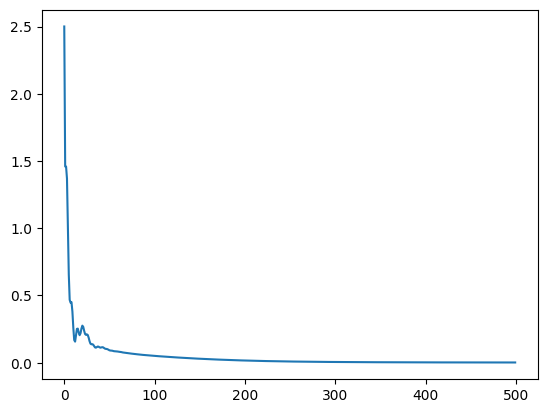

In [ ]:
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(losses)

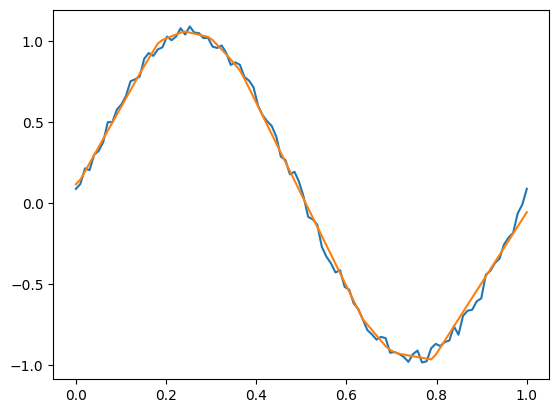

In [ ]:
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(X, y)
    plt.plot(X, neuron_2.forward(activation.forward(neuron_1.forward(X))))

## 3.3 Построение сетей при помощи `torch.nn`

In [ ]:
import torch.nn as nn

3.3.1 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде класса - наследника `nn.Module`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim`

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

In [ ]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

neuron = SineNet(3)
optimizer = optim.Adam(neuron.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

for epoch in range(2001):
    optimizer.zero_grad()

    y_pred = neuron.forward(X)
    loss_val = loss(y_pred, y)

    loss_val.backward()

    optimizer.step()

    if epoch % 100 == 0: print(f"Epoch {epoch} loss: {loss_val}")

Epoch 0 loss: 1.1811115741729736
Epoch 100 loss: 0.44383910298347473
Epoch 200 loss: 0.2906346917152405
Epoch 300 loss: 0.18671183288097382
Epoch 400 loss: 0.17261946201324463
Epoch 500 loss: 0.16345518827438354
Epoch 600 loss: 0.15269792079925537
Epoch 700 loss: 0.1394406259059906
Epoch 800 loss: 0.12315265834331512
Epoch 900 loss: 0.10457247495651245
Epoch 1000 loss: 0.08630213886499405
Epoch 1100 loss: 0.06950623542070389
Epoch 1200 loss: 0.054895997047424316
Epoch 1300 loss: 0.043460093438625336
Epoch 1400 loss: 0.035294059664011
Epoch 1500 loss: 0.029648013412952423
Epoch 1600 loss: 0.02562137134373188
Epoch 1700 loss: 0.022547520697116852
Epoch 1800 loss: 0.020004410296678543
Epoch 1900 loss: 0.017757004126906395
Epoch 2000 loss: 0.015701955184340477


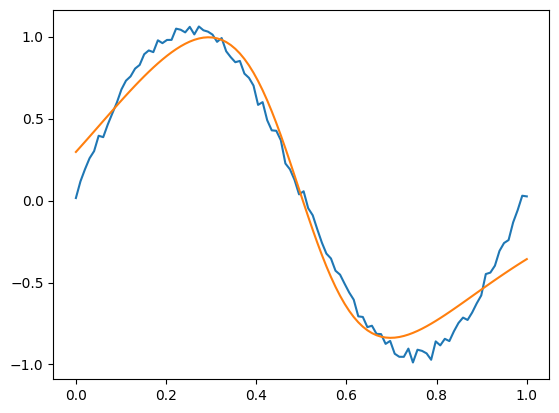

In [ ]:
with torch.no_grad():
    plt.plot(X, y)
    plt.plot(X, neuron(X))

3.3.2 Решить задачу регрессии, соблюдая следующие условия:

1. Оформить нейронную сеть в виде объекта `nn.Sequential`
2. При создании сети использовать готовые блоки из `torch.nn`: слои, функции активации, функции потерь и т.д.
3. Для оптимизации использовать любой алгоритм оптимизации из `torch.optim`

In [ ]:
X = torch.linspace(0, 1, 100).view(-1, 1)
y = torch.sin(2 * np.pi * X) + 0.1 * torch.rand(X.size())

layers = [
    torch.nn.Linear(1, 5),
    torch.nn.Sigmoid(),
    torch.nn.Linear(5, 1)
]
model = torch.nn.Sequential(*layers)

optimizer = optim.Adam(model.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

for epoch in range(2001):
    optimizer.zero_grad()

    y_pred = model.forward(X)
    loss_val = loss(y_pred, y)

    loss_val.backward()

    optimizer.step()

    if epoch % 100 == 0: print(f"Epoch {epoch} loss: {loss_val}")

Epoch 0 loss: 0.5610355138778687
Epoch 100 loss: 0.28419044613838196
Epoch 200 loss: 0.18813571333885193
Epoch 300 loss: 0.18531201779842377
Epoch 400 loss: 0.18132264912128448
Epoch 500 loss: 0.1754094660282135
Epoch 600 loss: 0.16652092337608337
Epoch 700 loss: 0.15225200355052948
Epoch 800 loss: 0.12838628888130188
Epoch 900 loss: 0.0956653282046318
Epoch 1000 loss: 0.060672059655189514
Epoch 1100 loss: 0.03312540054321289
Epoch 1200 loss: 0.018247973173856735
Epoch 1300 loss: 0.012009148485958576
Epoch 1400 loss: 0.009323781356215477
Epoch 1500 loss: 0.007820372469723225
Epoch 1600 loss: 0.006655762903392315
Epoch 1700 loss: 0.00562490988522768
Epoch 1800 loss: 0.004712724592536688
Epoch 1900 loss: 0.003926015924662352
Epoch 2000 loss: 0.003263938706368208


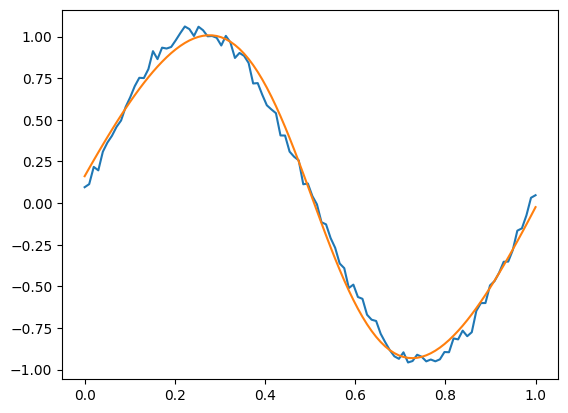

In [ ]:
with torch.no_grad():
    plt.plot(X, y)
    plt.plot(X, model(X))

## 3.4. Datasets and dataloaders

In [ ]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

3.4.1 Создать датасет, поставляющий данные из задачи 3.1.2.

Создать `DataLoader` на основе этого датасета и проверить работоспособность.

Воспользовавшись результатами 3.3.1 (или 3.3.2) обучите модель, пользуясь мини-пакетным градиентным спуском с размером пакета (`batch_size`) = 10

In [ ]:
class SinDataset(Dataset):
  def __init__(self):
    self.X = torch.linspace(0, 1, 100).view(-1, 1)
    self.y = torch.sin(2 * np.pi * self.X) + 0.1 * torch.rand(self.X.size())
    #pass

  def __len__(self):
    return len(self.X)
    #pass

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]
    #pass

3.4.2 Предсказание цен алмазов

3.4.2.1 Создайте датасет на основе файла diamonds.csv.

1. Удалите все нечисловые столбцы
2. Целевой столбец (`y`) - `price`
3. Преобразуйте данные в тензоры корректных размеров

3.4.2.2 Разбейте датасет на обучающий и тестовый датасет при помощи `torch.utils.data.random_split`.

3.4.2.3 Обучите модель для предсказания цен при помощи мини-пакетного градиентного спуска (`batch_size = 256`).

3.4.2.4 Выведите график функции потерь в зависимости от номера эпохи (значение потерь для эпохи рассчитывайте как среднее значение ошибок на каждом батче). Проверьте качество модели на тестовой выборке.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class DiamondsDataset(Dataset):
  def __init__(self, data):
    super().__init__()
    self.data = pd.read_csv(data, index_col = [0])
    #pass

  def __len__(self):
    return len(self.data)
    #pass

  def __getitem__(self, idx):
    self.X = torch.FloatTensor(self.data.select_dtypes(['number']).values)
    self.y = torch.FloatTensor(self.data['price'].values)
    return self.X[idx], self.y[idx]
    #pass

In [ ]:
dataset = DiamondsDataset('/content/drive/MyDrive/datasets/diamonds.csv')

train, test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)])

diamonds_dataloader_train = DataLoader(train, batch_size=256)
diamonds_dataloader_test = DataLoader(test, batch_size=256)

In [ ]:
class DiamondsNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, n_features):
        super(DiamondsNet, self).__init__()
        self.fc1 = torch.nn.Linear(n_hidden_neurons, n_features)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_features, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

neuron = DiamondsNet(7, 49)
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.025)
loss = torch.nn.MSELoss()

loss_vals = []
for epoch in range(20):
    X_new, y_new = next(iter(diamonds_dataloader_train))
    optimizer.zero_grad()

    y_pred = neuron.forward(X_new)
    loss_val = loss(y_pred, y_new)
    loss_vals.append(loss_val)

    loss_val.backward()

    optimizer.step()

    print(f"Epoch {epoch} loss: {loss_val}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 loss: 40205672.0
Epoch 1 loss: 22461296.0
Epoch 2 loss: 21388248.0
Epoch 3 loss: 20933872.0
Epoch 4 loss: 20915696.0
Epoch 5 loss: 20914970.0
Epoch 6 loss: 20914940.0
Epoch 7 loss: 20914938.0
Epoch 8 loss: 20914938.0
Epoch 9 loss: 20914936.0
Epoch 10 loss: 20914938.0
Epoch 11 loss: 20914940.0
Epoch 12 loss: 20914940.0
Epoch 13 loss: 20914940.0
Epoch 14 loss: 20914940.0
Epoch 15 loss: 20914940.0
Epoch 16 loss: 20914940.0
Epoch 17 loss: 20914940.0
Epoch 18 loss: 20914940.0
Epoch 19 loss: 20914940.0


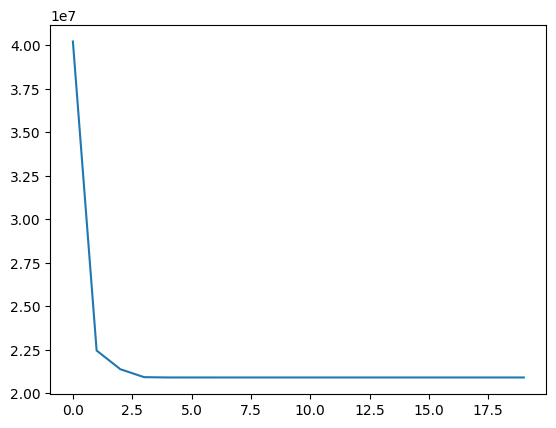

In [ ]:
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(loss_vals)

3.4.3 Модифицируйте метод `__init__` датасета из 3.4.2 таким образом, чтобы он мог принимать параметр `transform: callable`. Реализуйте класс `DropColsTransform` для удаления нечисловых данных из массива. Реализуйте класс `ToTensorTransorm` для трансформации массива в тензор.

In [ ]:
class DiamondsDataset(Dataset):
  def __init__(self, data, transform=None):
    self.data = pd.read_csv(data, index_col = [0])
    self.transform = transform

  def __len__(self):
    return len(self.data)
    #pass

  def __getitem__(self, idx):
    X = self.data.drop('price', axis=1)
    y = self.data['price']
    sample = X.iloc[idx], y.iloc[idx]
    if self.transform:
      sample = self.transform(sample)
    return sample

In [ ]:
class DropColsTransform:
  def __init__(self, drop):
    self.drop = drop
    #pass

  def __call__(self, sample):
    X, y = sample
    # <удаление из X столбцов self.drop>
    X = X.drop(X.index[self.drop], axis=0)
    return X, y

In [ ]:
class ToTensorTransform:
  def __call__(self, sample):
    X, y = sample
    # <преобразование X и y в тензоры>
    X = torch.FloatTensor(X.astype('float64').values)
    y = torch.FloatTensor([y])
    return X, y

In [ ]:
from torchvision import transforms

drop = DropColsTransform(drop=[1, 2, 3])
to_tensor = ToTensorTransform()
dataset = DiamondsDataset('/content/drive/MyDrive/datasets/diamonds.csv', transform=transforms.Compose([drop, to_tensor]))


In [ ]:
train, test = torch.utils.data.random_split(dataset, [int(len(dataset)*0.8), int(len(dataset)*0.2)])

diamonds_dataloader_train = DataLoader(train, batch_size=256)
diamonds_dataloader_test = DataLoader(test, batch_size=256)

In [ ]:
class DiamondsNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, n_features):
        super(DiamondsNet, self).__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(n_features, n_hidden_neurons),
            torch.nn.Sigmoid(),
            torch.nn.Linear(n_hidden_neurons,n_hidden_neurons),
            torch.nn.Sigmoid(),
            torch.nn.Linear(n_hidden_neurons,n_hidden_neurons*2),
            torch.nn.Sigmoid(),
            torch.nn.Linear(n_hidden_neurons*2,1)
        )

    def forward(self, x):
        x = self.net(x)
        return x

neuron = DiamondsNet(16, 6)
optimizer = torch.optim.SGD(neuron.parameters(), lr=0.01)
loss = torch.nn.MSELoss()

loss_vals = []
for epoch in range(35):
    X_new, y_new = next(iter(diamonds_dataloader_train))
    optimizer.zero_grad()

    y_pred = neuron.forward(X_new)
    loss_val = loss(y_pred, y_new)
    loss_vals.append(loss_val)

    loss_val.backward()

    optimizer.step()

    print(f"Epoch {epoch} loss: {loss_val}")

Epoch 0 loss: 29271280.0
Epoch 1 loss: 23319408.0
Epoch 2 loss: 16556782.0
Epoch 3 loss: 14542308.0
Epoch 4 loss: 14069176.0
Epoch 5 loss: 13960167.0
Epoch 6 loss: 13935051.0
Epoch 7 loss: 13929264.0
Epoch 8 loss: 13927930.0
Epoch 9 loss: 13927624.0
Epoch 10 loss: 13927553.0
Epoch 11 loss: 13927537.0
Epoch 12 loss: 13927532.0
Epoch 13 loss: 13927532.0
Epoch 14 loss: 13927532.0
Epoch 15 loss: 13927531.0
Epoch 16 loss: 13927532.0
Epoch 17 loss: 13927533.0
Epoch 18 loss: 13927532.0
Epoch 19 loss: 13927532.0
Epoch 20 loss: 13927531.0
Epoch 21 loss: 13927532.0
Epoch 22 loss: 13927531.0
Epoch 23 loss: 13927531.0
Epoch 24 loss: 13927531.0
Epoch 25 loss: 13927531.0
Epoch 26 loss: 13927531.0
Epoch 27 loss: 13927531.0
Epoch 28 loss: 13927531.0
Epoch 29 loss: 13927531.0
Epoch 30 loss: 13927531.0
Epoch 31 loss: 13927531.0
Epoch 32 loss: 13927531.0
Epoch 33 loss: 13927531.0
Epoch 34 loss: 13927531.0


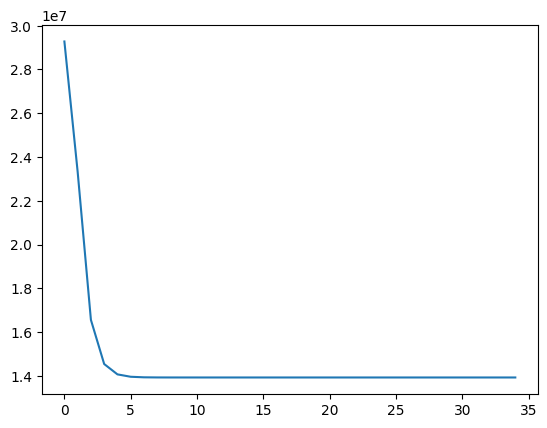

In [ ]:
with torch.no_grad():
    plt.plot(loss_vals)

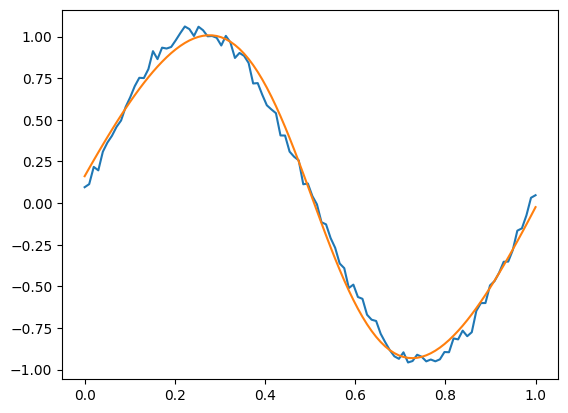

In [ ]:
with torch.no_grad():
    plt.plot(X, y)
    plt.plot(X, model(X))